In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder


#%matplotlib inline



In [11]:
df=pd.read_csv("data.csv")
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<AxesSubplot:xlabel='Churn', ylabel='count'>

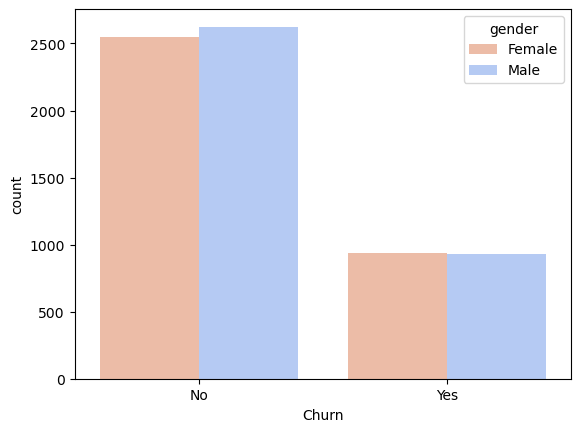

In [13]:
sns.countplot(x='Churn',data=df,hue='gender',palette="coolwarm_r")

<AxesSubplot:xlabel='Churn', ylabel='count'>

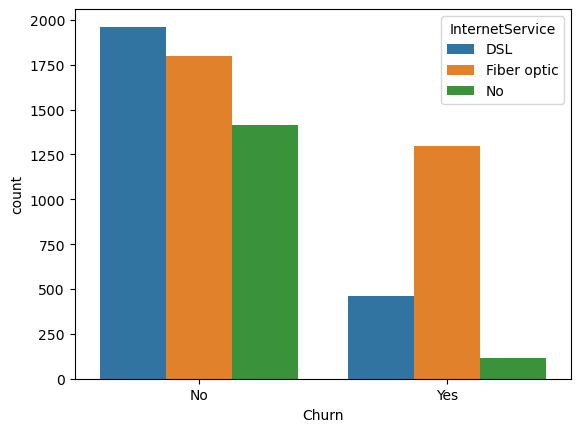

In [14]:
sns.countplot(x='Churn',data=df, hue='InternetService')

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

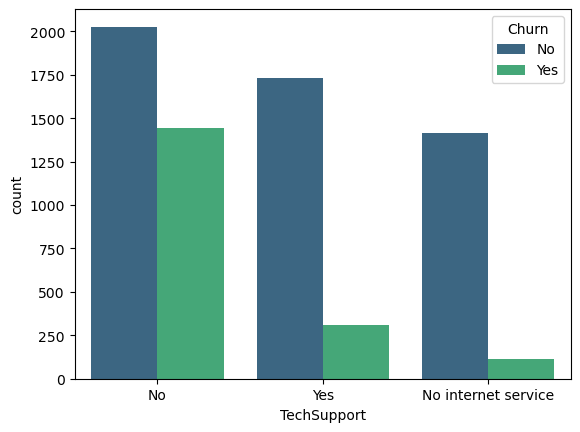

In [15]:
sns.countplot(x='TechSupport',data=df, hue='Churn',palette='viridis')

[Text(0.5, 0, 'Tenure in Months'), Text(0, 0.5, 'Count')]

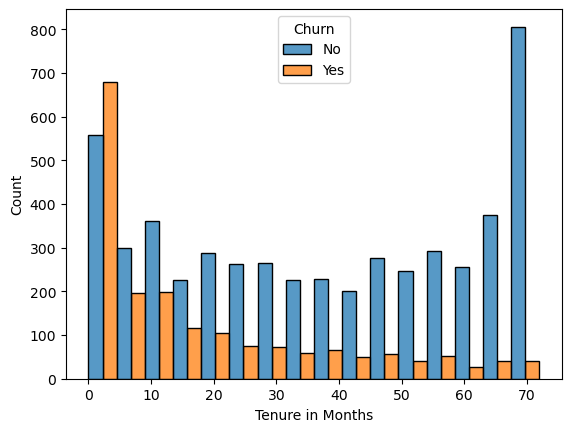

In [16]:
ax = sns.histplot(x = 'tenure', hue = 'Churn', data = df, multiple='dodge')
ax.set(xlabel="Tenure in Months", ylabel = "Count")

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

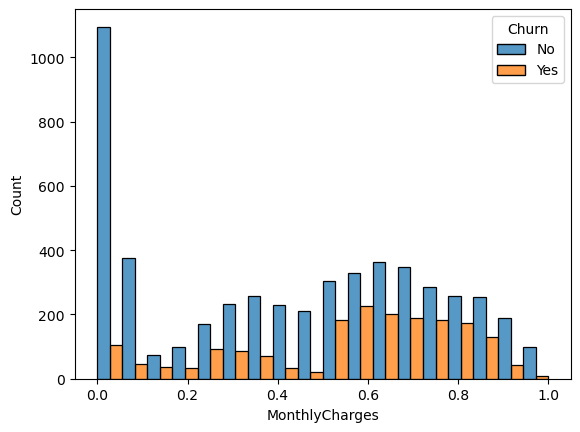

In [30]:
sns.histplot(x='MonthlyCharges',hue='Churn',data=df,multiple='dodge')

In [31]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [45]:
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Use LabelEncoder to transform categorical columns into numeric labels
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Create a MinMaxScaler instance
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to your feature data and transform it
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame and assign column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Now you can use X_scaled_df for your machine learning tasks

In [47]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,0.013889,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,29.85,No
1,5575-GNVDE,Male,0,No,No,0.472222,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,0.385075,1889.5,No
2,3668-QPYBK,Male,0,No,No,0.027778,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,108.15,Yes
3,7795-CFOCW,Male,0,No,No,0.625000,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,1840.75,No
4,9237-HQITU,Female,0,No,No,0.027778,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,151.65,Yes


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_c=RandomForestClassifier()
param_grid={'n_estimators':[int(x) for x in np.linspace(start=200,stop=1200,num=11)],
            'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
            'min_samples_leaf':[1,2,3,5],
            'min_samples_split':[2,5,10,15]}

In [52]:
random_cv=RandomizedSearchCV(rf_c,param_grid,cv=3,verbose=2,random_state=42)
random_cv.fit(X_train,y_train)
best_random=random_cv.best_estimator_
prediction_cv=best_random.predict(X_test)
print(accuracy_score(y_test,prediction_cv))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   3.9s
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   4.4s
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   3.9s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   4.9s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   4.5s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   5.0s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.8s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estima

In [53]:
print(confusion_matrix(y_test,prediction_cv))

[[1415  139]
 [ 285  274]]


In [ ]:


#It shows that our model needs to improve the False Negative classifications.

#[[1415  139]
# [ 285  274]]
#In this confusion matrix:

#True Positives (TP): 274

#These are cases where the model correctly predicted that the churn occurred (Positive class) and the actual outcome was also a churn (Churn).
#True Negatives (TN): 1415

#These are cases where the model correctly predicted that no churn occurred (Negative class) and the actual outcome was also no churn (No Churn).
#False Positives (FP): 139

#These are cases where the model incorrectly predicted churn (Positive class), but the actual outcome was no churn (No Churn).
#False Negatives (FN): 285

#These are cases where the model incorrectly predicted no churn (Negative class), but the actual outcome was churn (Churn).